# Dava Visualization using yfinance
**Name**: Hojin Lee<br>
**Course**: CIS9760

In this project, I used a Lambda function via AWS to generate near real time yfinance data records for interactive querying. I took the query result that I created in AWS Athena and will generate four visualizations on the data.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
yf = pd.read_csv("/Users/hojin/Desktop/results.csv")

In [9]:
yf.head()

,company,max_price,hour
0,BYND,37.804901,9
1,BYND,37.990002,10
2,BYND,37.590000,11
3,BYND,37.330002,12
4,BYND,36.570000,13


In [10]:
yf.shape

(80, 3)

In [11]:
yf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   company    80 non-null     object 
 1   max_price  80 non-null     float64
 2   hour       80 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


In [12]:
yf["company"].unique()

array(['BYND', 'DDOG', 'FB', 'NFLX', 'OKTA', 'PINS', 'SHOP', 'SNAP', 'SQ',
       'TTD'], dtype=object)

### 1) Highest Stock Price at the First Trading Hour (or Any Hour) (A Bar Chart: Each bar refers to a company)

In [13]:
firstTradingHour = yf[yf['hour'] == 9].sort_values(['max_price'], ascending=False)

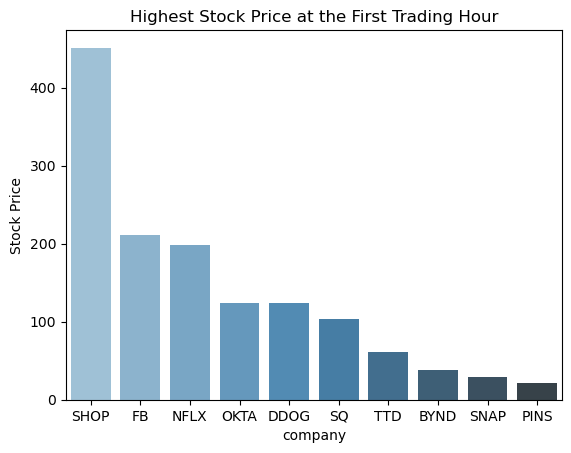

In [14]:
sns.barplot(data = firstTradingHour, 
            x = "company", y = "max_price", 
            ci = None, palette = "Blues_d")
plt.ylabel("Stock Price")
plt.title("Highest Stock Price at the First Trading Hour")
plt.show()

### 2) Highest Hourly Stock Price Trend (A Line Chart: Each line refers to a company)

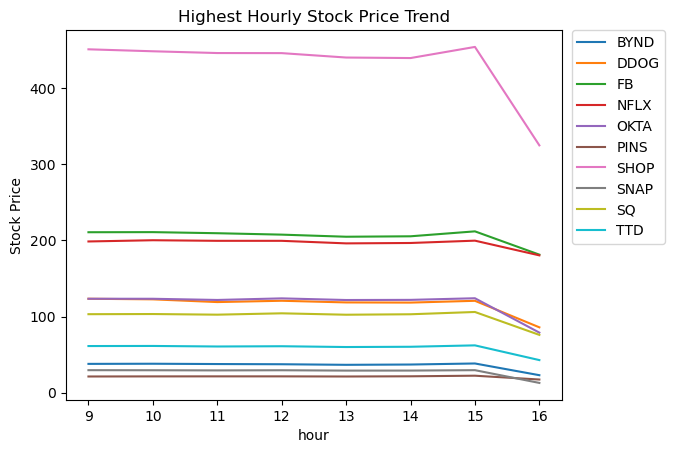

In [15]:
sns.lineplot(data = yf, x="hour", y="max_price", hue="company", ci=None)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.ylabel("Stock Price")
plt.title("Highest Hourly Stock Price Trend")
plt.show()

### 3) Comparison of Opening and Closing Price (A Grouped Bar Chart: Each group refers to a company and the bars refer to the opening and closing prices)

In [18]:
yf["hour"].unique()

array([ 9, 10, 11, 12, 13, 14, 15, 16])

In [19]:
oc = yf[(yf["hour"] == 9) | (yf["hour"] == 16)]

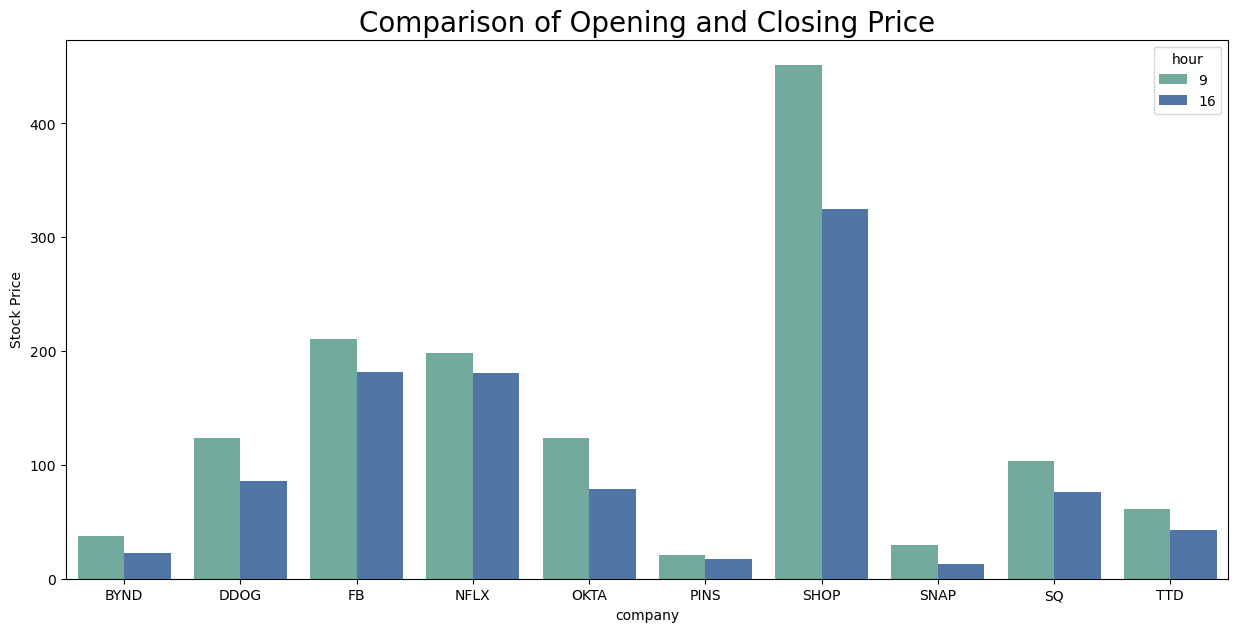

In [20]:
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(15, 7))

# grouped barplot
sns.barplot(data=oc, x="company", y="max_price", hue="hour", ci=None)
plt.title("Comparison of Opening and Closing Price", fontsize=20)
plt.ylabel("Stock Price")
plt.show()

### 4) Average Highest Hourly Stock Price (A Bar Chart: Each bar refers to a company)

In [15]:
avgStock = yf.groupby("company")["max_price"].mean()
avgStock = pd.DataFrame(avgStock).reset_index().sort_values(by=["max_price"])

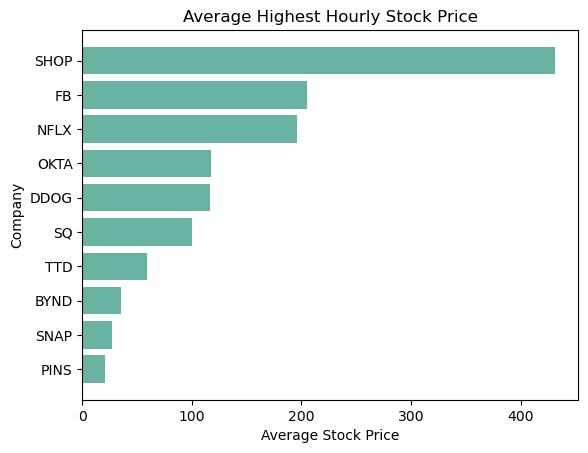

In [16]:
plt.barh(avgStock["company"], avgStock["max_price"])
plt.title("Average Highest Hourly Stock Price")
plt.ylabel("Company")
plt.xlabel("Average Stock Price")
plt.show()